<h3>Grunfeld's Investment Data</h2>

1. Upload data from dataset:

In [2]:
import pandas as pd

grunfeld_df=pd.read_csv('Grunfeld.csv',index_col=0)
grunfeld_df.head(10)

,invest,value,capital,firm,year
1,317.6,3078.5,2.8,General Motors,1935
2,391.8,4661.7,52.6,General Motors,1936
3,410.6,5387.1,156.9,General Motors,1937
4,257.7,2792.2,209.2,General Motors,1938
5,330.8,4313.2,203.4,General Motors,1939
6,461.2,4643.9,207.2,General Motors,1940
7,512.0,4551.2,255.2,General Motors,1941
8,448.0,3244.1,303.7,General Motors,1942
9,499.6,4053.7,264.1,General Motors,1943
10,547.5,4379.3,201.6,General Motors,1944


2. Find mathematical hope, median, mode, variance, middle -class deviation (explain their content)

In [3]:
import statistics
grouping_categories=pd.Series(['firm', 'year'])
grunfeld_cols_not_in_grouping_categories=[k for k in grunfeld_df.columns.tolist() if k not in grouping_categories.values]
df_stats=pd.Series(index=grouping_categories)

for k in grouping_categories.values:
    groups=grunfeld_df.groupby(k)

    group_stats=pd.Series(index=grunfeld_cols_not_in_grouping_categories)
    for j in grunfeld_cols_not_in_grouping_categories:
        column_names_of_stat=['grouped_by_'+k,
                'mean_'+j,
                'median_'+j,
                'mode_'+j,
                'variance_'+j,
                'standard_deviation_'+j ]
        stat=pd.DataFrame(columns=column_names_of_stat)
                                    
        for i in groups.groups.keys():
            row=[[i,
                groups.get_group(i)[j].mean(),
                groups.get_group(i)[j].median(),
                groups.get_group(i)[j].mode(),
                statistics.pvariance( groups.get_group(i)[j]),
                statistics.stdev( groups.get_group(i)[j])]]
            stat=pd.concat([stat, pd.DataFrame(row, columns=column_names_of_stat)], ignore_index=True)
        group_stats.loc[j]=[stat]
    df_stats.loc[k]=[group_stats]


df_stats['year'][0]['invest'][0]


C:\Users\vikto\AppData\Local\Temp\ipykernel_18772\4076445678.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_stats=pd.Series(index=grouping_categories)
C:\Users\vikto\AppData\Local\Temp\ipykernel_18772\4076445678.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  group_stats=pd.Series(index=grunfeld_cols_not_in_grouping_categories)
C:\Users\vikto\AppData\Local\Temp\ipykernel_18772\4076445678.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  group_stats=pd.Series(index=grunfeld_cols_not_in_grouping_categories)


,groupedby_year,mean_invest,median_invest,mode_invest,variance_invest,standart_deviationinvest
0,1935,66.399818,26.63,0 2.540 1 2.938 2 12.930 3 ...,9329.604713,101.304320
1,1936,92.883000,25.98,0 2.000 1 5.643 2 23.210 3 ...,17927.774725,140.429884
2,1937,112.276636,35.05,0 2.190 1 10.233 2 25.940 3 ...,24601.686253,164.504878
3,1938,70.872364,32.54,0 1.990 1 4.046 2 20.890 3 ...,8206.475983,95.011176
4,1939,73.507818,28.78,0 2.030 1 3.326 2 18.840 3 ...,10224.422509,106.051236
5,1940,103.393636,33.71,0 1.81 1 4.68 2 26.93 3 ...,21990.759823,155.530819
6,1941,127.538364,48.51,0 2.140 1 5.732 2 32.080 3 ...,30469.509667,183.075014
7,1942,112.615182,42.81,0 1.860 1 12.117 2 32.210 3 ...,25277.750605,166.749890
8,1943,108.470545,44.28,0 0.930 1 15.276 2 27.840 3 ...,24220.254330,163.224630
9,1944,110.775000,56.80,0 1.180 1 9.275 2 32.600 3 ...,24440.045950,163.963565


3. visualize the downloaded data by histogram

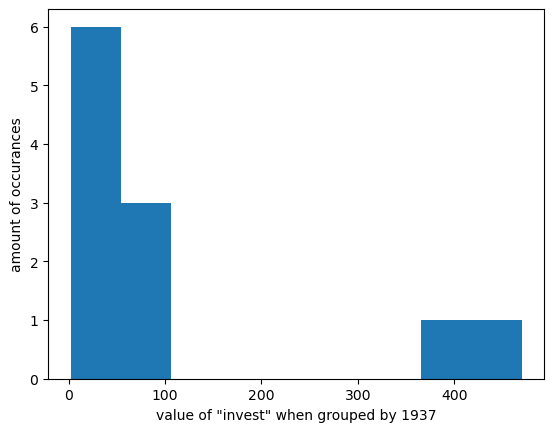

In [29]:
import matplotlib.pyplot as plt
bins=9

def plot_hist_of(param: dict)->None:
    grouping_col_name=list(param.keys())[0]
    hist_col_name=list(param.keys())[1]

    assert len(param) == 2
    assert grouping_col_name in grouping_categories.values

    hist=list(grunfeld_df.groupby(grouping_col_name).get_group(param[grouping_col_name])[param[hist_col_name]])
    plt.hist(hist, bins=bins)
    plt.xlabel('value of "{}" when grouped by {}'.format(param[hist_col_name], param[grouping_col_name]))
    plt.ylabel('amount of occurances')
    plt.show()

plot_hist_of({'year': 1937, 'hist_column': 'invest'})
# plot_hist_of({'firm': 'American Steel', 'hist_column': 'capital'})

4. For this data, perform all actions from the chapter "Series Collection Library Pandas":
   
    4.1 Creating Series with Default Indexes 

    4.2 Output of the Series Collection(see first cell)

    4.3 Creating a series collection with the same values 
    
    4.4 Adress to SERIES element by index(see first cell)
    
    4.5 Calculation of descriptive statistics for series

    4.6 Creating a series collection with non -standard indexes

    4.7 Dictionaries as an initializer

    4.8 Appeal to Series items using non -standard indices

    4.9 Creating a series collection with string items

In [5]:
# frist column of main dataframe
first_col=pd.Series(grunfeld_df['invest'])
first_col=first_col.reset_index(drop=True)
first_col

0      317.600
1      391.800
2      410.600
3      257.700
4      330.800
        ...   
215      4.770
216      6.532
217      7.329
218      9.020
219      6.281
Name: invest, Length: 220, dtype: float64

In [6]:
# collection with same values
same_vals=pd.Series(grunfeld_df.at[1, 'invest'], range(3))
same_vals

0    317.6
1    317.6
2    317.6
dtype: float64

In [7]:
print( 'count : {}'.format(first_col.count()), )
print( 'mean : {}'.format(first_col.mean()), )
print( 'min : {}'.format(first_col.min()), )
print( 'max : {}'.format(first_col.max()), )
print( 'standart deviation : {}'.format(first_col.std()), )

count : 220
mean : 133.31189999999992
min : 0.93
max : 1486.7
standart deviation : 210.58718635614184


In [8]:
first_col.describe()

count     220.000000
mean      133.311900
std       210.587186
min         0.930000
25%        27.380000
50%        52.365000
75%        99.782500
max      1486.700000
Name: invest, dtype: float64

In [9]:
second_col= pd.Series(grunfeld_df['capital'])
second_col=second_col.reset_index(drop=True)
second_col.index=second_col.index.map(lambda x: 'value '+str(x))
second_col

value 0        2.800
value 1       52.600
value 2      156.900
value 3      209.200
value 4      203.400
              ...   
value 215     75.847
value 216     77.367
value 217     78.631
value 218     80.215
value 219     83.788
Name: capital, Length: 220, dtype: float64

In [10]:
# dictionary init
values=pd.Series({'firstRowInvest': grunfeld_df.at[1, 'invest'], 'firstRowFirm': grunfeld_df.at[1, 'firm']})
values

firstRowInvest             317.6
firstRowFirm      General Motors
dtype: object

In [30]:
# non standart index
values['firstRowInvest']

# values.dtype
# values.values

317.6

In [31]:
# str elements
str_column=pd.Series(grunfeld_df.groupby('firm').groups.keys())
str_column.str.contains('a')
str_column.str.upper()
str_column

0      True
1      True
2     False
3      True
4      True
5      True
6      True
7     False
8     False
9     False
10    False
dtype: bool

5. For this data, perform all actions from the chapter "Dataframe Collection Library Pandas":

    5.1 Creating a DataFrame based on a dictionary 
    
    5.2 DATAFRAME index setting using an Index attribute

    5.3 Address to Dataframe columns

    5.4 Choosing lines using the attributes of Loc and Iloc

    5.5 Logical indexing 

    5.6 Appeal to a particular Dataframe cell on a row and column

    5.7 Descriptive statistics 

    5.8 Dataframe transposition using attribute T

    5.9 Sorting rows by indexes

    5.10 Sorting by column indexes

    5.11 Sorting by column values

In [13]:
#Creating a DataFrame based on a dictionary
cols_dict={'invest_col': first_col[0:10], 'capital_col':second_col['value 0': 'value 9'].reset_index(drop=True) }
cols=pd.DataFrame(cols_dict)
cols

,invest_col,capital_col
0,317.6,2.8
1,391.8,52.6
2,410.6,156.9
3,257.7,209.2
4,330.8,203.4
5,461.2,207.2
6,512.0,255.2
7,448.0,303.7
8,499.6,264.1
9,547.5,201.6


In [14]:
# cols.index=cols.index.map(lambda x: 'index '+ str(x))
cols.index=['index '+str(k) for k in range(10)]
cols

,invest_col,capital_col
index 0,317.6,2.8
index 1,391.8,52.6
index 2,410.6,156.9
index 3,257.7,209.2
index 4,330.8,203.4
index 5,461.2,207.2
index 6,512.0,255.2
index 7,448.0,303.7
index 8,499.6,264.1
index 9,547.5,201.6


In [15]:
cols.invest_col
cols['invest_col']

index 0    317.6
index 1    391.8
index 2    410.6
index 3    257.7
index 4    330.8
index 5    461.2
index 6    512.0
index 7    448.0
index 8    499.6
index 9    547.5
Name: invest_col, dtype: float64

In [16]:
cols.loc['index 0']
cols.loc['index 3':'index 5', 'invest_col']

index 3    257.7
index 4    330.8
index 5    461.2
Name: invest_col, dtype: float64

In [17]:
cols[cols['invest_col']>350]
cols[cols>350]

,invest_col,capital_col
index 0,NaN,NaN
index 1,391.8,NaN
index 2,410.6,NaN
index 3,NaN,NaN
index 4,NaN,NaN
index 5,461.2,NaN
index 6,512.0,NaN
index 7,448.0,NaN
index 8,499.6,NaN
index 9,547.5,NaN


In [18]:
cols.at['index 5', 'capital_col']

207.2

In [19]:
pd.set_option('display.precision', 2)
cols.describe()
cols.mean()

invest_col     417.68
capital_col    185.67
dtype: float64

In [20]:
cols.T.describe()
cols.T.mean()

index 0    160.20
index 1    222.20
index 2    283.75
index 3    233.45
index 4    267.10
index 5    334.20
index 6    383.60
index 7    375.85
index 8    381.85
index 9    374.55
dtype: float64

In [21]:
cols.sort_index(ascending=False)

,invest_col,capital_col
index 9,547.5,201.6
index 8,499.6,264.1
index 7,448.0,303.7
index 6,512.0,255.2
index 5,461.2,207.2
index 4,330.8,203.4
index 3,257.7,209.2
index 2,410.6,156.9
index 1,391.8,52.6
index 0,317.6,2.8


In [22]:
#Sorting by column indexes
cols.sort_index(axis=1)

,capital_col,invest_col
index 0,2.8,317.6
index 1,52.6,391.8
index 2,156.9,410.6
index 3,209.2,257.7
index 4,203.4,330.8
index 5,207.2,461.2
index 6,255.2,512.0
index 7,303.7,448.0
index 8,264.1,499.6
index 9,201.6,547.5


In [23]:
#Sorting by column values
cols.T.sort_values(by='invest_col', axis=1)


,index 3,index 0,index 4,index 1,index 2,index 7,index 5,index 8,index 6,index 9
invest_col,257.7,317.6,330.8,391.8,410.6,448.0,461.2,499.6,512.0,547.5
capital_col,209.2,2.8,203.4,52.6,156.9,303.7,207.2,264.1,255.2,201.6


5. 	Perform initial data processing(data is clean already)
6.  Read a set of data of the Titanic catastrophe
7. Download the Titanic Catastrophe Data by URL
8. View the Titanic Catastrophe Data Set
9. Set up column names
10. Conduct a simple data analysis: Identify the youngest passenger, the oldest who was the average age of passengers and the statistics on the surviving passengers.Sort all women with 1st class cabin, find the youngest and oldest among them
11. Construct a histogram of the age of passengers

In [24]:
titanic_df=pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/TitanicSurvival.csv')
titanic_df.head(5)

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st


In [25]:
titanic_df.tail(5)

,Unnamed: 0,survived,sex,age,passengerClass
1304,"Zabour, Miss. Hileni",no,female,14.5,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0,3rd
1308,"Zimmerman, Mr. Leo",no,male,29.0,3rd


In [26]:
new_cols=list(titanic_df.columns)
new_cols[0]='name'
new_cols[-1]='class'
titanic_df.columns=new_cols
titanic_df

,name,survived,sex,age,class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st
...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",no,female,14.50,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.50,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.00,3rd


In [27]:
youngest_passenger=titanic_df.sort_values(by='age').iloc[0]
print(youngest_passenger)

oldest_passenger=titanic_df.sort_values(by='age').dropna(subset=['age']).iloc[-1]
print(oldest_passenger)

avg_survive_age=titanic_df['age'].mean()
print(avg_survive_age)

#survived statistics
print(titanic_df[titanic_df['survived']=='yes'].describe())

first_class_women=titanic_df[(titanic_df['class']=='1st') & (titanic_df['sex']=='female')].sort_values(by='age')
print(first_class_women)

youngest_first_class_woman=first_class_women.iloc[0]
print(youngest_first_class_woman)

oldest_first_class_woman=first_class_women.dropna(subset=['age']).iloc[-1]
print(oldest_first_class_woman)

first_class_woman_survived_count=(first_class_women['survived']=='yes').sum( )
print(first_class_woman_survived_count)

name        Dean, Miss. Elizabeth Gladys M
survived                               yes
sex                                 female
age                                   0.17
class                                  3rd
Name: 763, dtype: object
name        Barkworth, Mr. Algernon Henry W
survived                                yes
sex                                    male
age                                    80.0
class                                   1st
Name: 14, dtype: object
29.881134512434034
          age
count  427.00
mean    28.92
std     15.06
min      0.17
25%     20.00
50%     28.00
75%     38.00
max     80.00
                                name survived     sex   age class
2       Allison, Miss. Helen Loraine       no  female   2.0   1st
55         Carter, Miss. Lucile Polk      yes  female  14.0   1st
193  Madill, Miss. Georgette Alexand      yes  female  15.0   1st
195            Maioni, Miss. Roberta      yes  female  16.0   1st
159     Hippach, Miss. Jean Gertrude     

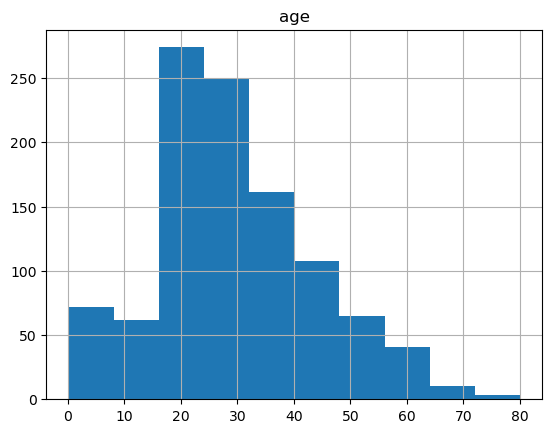

In [28]:
histogram=titanic_df.hist()